# Ravenous Tigers and Asthmatic Polar Bears: Balancing public health and environmental concerns in rapidly industrializing economies

As countries across the globe begin to cooperate more to mitigate the risks of global warming a consistent complaint from developing countries has been that the proposed regulations would significantly impact their ability to pursue economic growth and the related political goals that rely on the social stability brought by increasing economic propserity. Both the traditional developed Western economies and the more recently developed Asian "tigers" of Japan, South Korea, and more recently China  have all developed by relying on the same cheap, dirty fuels we are now asking currently industrializing countries in the Global South to forgo. During the periods of rapid industrialization of the develped countries there have historically been marked decreases in public health and mortality laregly due to the effects of industrial air pollution on the respiratory system. 

Doubtless this issue must be attacked from several direction if we are to solve the fairness issue while still addressing our common environemental threat. One approach is to consider when to allow certain kinds of manufacturing or power generation activity so that economic output is maxmized while still working to minimize the effect on public health and global warming. By analyzing a local dataset of particulate measurement (PM) readings with several weather variables over time we can provide guidance to both industry and government to craft policies which can help address this problem.

# About the Data

Our data set is a subset of Song Xi Chen from the Guanghua School of Management, Center for Statistical Science, at Peking University. This hourly data set contains the PM2.5 data in Beijing, Shanghai, Guangzhou, Chengdu and Shenyang. Meanwhile, meteorological data for each city are also included. Our subset contains data from Shanghai from December 2012. Missing data are denoted as NA.

The data can be downloaded here: https://www.kaggle.com/team-ai/shanghai-pm25-air-pollution-historical-data/version/3



# Questions

In absence of particulate matter input to the environment from manufacturing activity, being able to compare particulate matter measurements with environmental weather variables should help us to discern the relationship, if any, between atmospheric factors and particulate matter readings. We may even be able to infer hypotheses about local manufacturing patterns.

My proposed questions are as follows:
   1. Which weather factors are strongest predictors of total particulate pollution?
   2. Does the strength of these factors depend on the time of day the measurement is taken?
   3. Can any trends about industrial activity patterns be gleaned from this data?

# Data Characterization

To characterize our data set we first imported it and deleted NaN values. Then we ran the .head() and .describe() methods to give an overview of the shape of our dataframe as well as the column headings. Next, we created a QQ plot and ran a .normaltest() method to determine whether our data had a normal distribution. Our data does not have a normal distribution, thus affecting which statistical analysis we will use in our analysis as we look to answer the questions posed above.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("/Users/brandonlewis/Desktop/Data Science with Thinkful/ShanghaiPM20130101_20151231.csv", low_memory = False)
df.dropna(axis=0, how='any')

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,0.0,0.0
1,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,0.0,0.0
3,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,0.0,0.0
4,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,0.0,0.0
5,26310,2013,1,1,5,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,SW,70.0,0.0,0.0
6,26311,2013,1,1,6,4,74.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,71.0,0.0,0.0
7,26312,2013,1,1,7,4,73.0,80.0,84.0,-4.0,86.15,1024.0,-2.0,cv,0.0,0.0,0.0
8,26313,2013,1,1,8,4,77.0,76.0,87.0,-5.0,79.89,1024.0,-2.0,cv,1.0,0.0,0.0
9,26314,2013,1,1,9,4,73.0,74.0,91.0,-3.0,60.25,1025.0,4.0,SW,4.0,0.0,0.0
10,26315,2013,1,1,10,4,82.0,76.0,88.0,-4.0,48.63,1025.0,6.0,SW,8.0,0.0,0.0


In [2]:
df.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,0.0,0.0
1,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,0.0,0.0
2,26307,2013,1,1,2,4,NaN,72.0,NaN,-5.0,69.00,1023.0,0.0,SW,63.0,0.0,0.0
3,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,0.0,0.0
4,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,0.0,0.0


In [31]:
print(df.shape)
df.describe()

(26280, 17)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,24700.000000,25510.000000,25189.000000,26275.000000,26275.000000,26260.000000,26275.000000,26276.000000,24194.0000,24194.000000
mean,39444.500000,2014.000000,6.526027,15.720548,11.500000,2.490411,57.395992,53.543316,57.678987,11.501351,69.523837,1015.972963,17.728107,46.929708,0.1474,1.048855
std,7586.526873,0.816512,3.447917,8.796414,6.922318,1.116788,47.616179,43.319399,48.412620,9.520815,18.035052,9.006366,9.032170,66.790312,1.0705,7.787734
min,26305.000000,2013.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-17.000000,13.090000,990.000000,-3.000000,0.000000,0.0000,0.000000
25%,32874.750000,2013.000000,4.000000,8.000000,5.750000,1.000000,26.000000,26.000000,26.000000,4.000000,57.250000,1008.000000,10.000000,6.000000,0.0000,0.000000
50%,39444.500000,2014.000000,7.000000,16.000000,11.500000,2.000000,44.000000,41.000000,43.000000,12.000000,72.230000,1016.000000,19.000000,19.000000,0.0000,0.000000
75%,46014.250000,2015.000000,10.000000,23.000000,17.250000,3.000000,73.000000,67.000000,73.000000,20.000000,83.480000,1023.000000,25.000000,60.000000,0.0000,0.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,635.000000,651.000000,636.000000,28.000000,100.000000,1040.000000,41.000000,615.000000,61.6000,226.400000


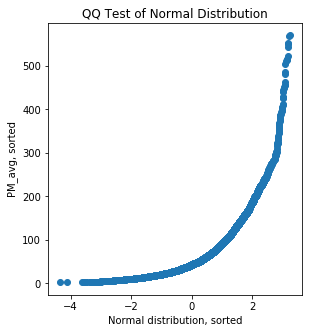

NormaltestResult(statistic=15435.003167257846, pvalue=0.0)


In [3]:
# checking for normal distribution with QQ plot
# generate sorted, normal distribution same length as df['PM_avg']
df['PM_avg'] = df[['PM_Jingan', 'PM_US Post', 'PM_Xuhui']].mean(axis=1)
norm = np.random.normal(0, 1, len(df['PM_avg']))
norm.sort()


plt.figure(figsize=(10, 5))
# Scatter plot of sorted PM_avg and sorted normal distribution
plt.subplot(1, 2, 1)
plt.scatter(norm, df['PM_avg'].sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last'))
plt.title('QQ Test of Normal Distribution')
plt.ylabel('PM_avg, sorted')
plt.xlabel('Normal distribution, sorted')
plt.show()

# Run stats.normaltest() to verify result
print(scipy.stats.normaltest(df['PM_avg'], axis=0, nan_policy='omit'))

# Analysis

## Question 1 - Which weather factors are strongest predictors of total particulate pollution?

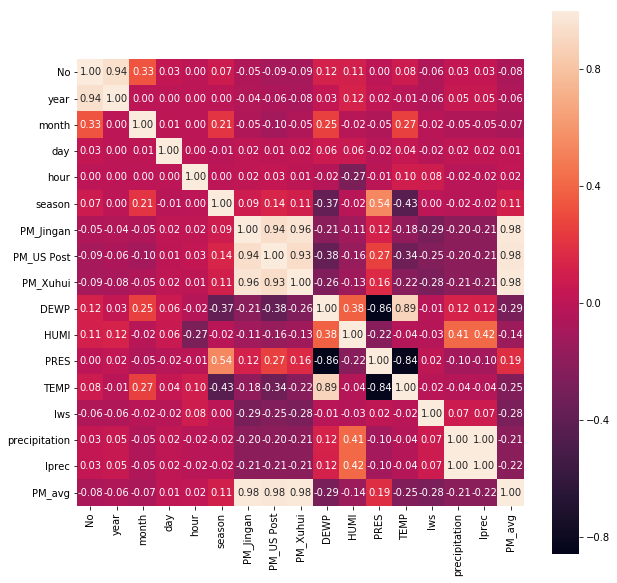

In [6]:
corrmat = df.corr(method='spearman') #use spearman method because all the data is ordinal
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1.0, square=True,annot=True,fmt='.2f')
plt.show()

We started our analysis by plotting a heatmap of all the variables with ordinal values using the Spearman correlation test. We chose the Spearman test as it does not require a normal distribution, but rather the much broader characterization of monotonicity. One can see the most highest correlation for the PM readings among the weather factors. Dewpoint, wind speed, and temperature all have strong correlation scores of 0.25 or greater when averaged among all three PM measurement locations - dewpoint being the strongest and temperature being the weakest. The PM reading increases the most when these three variables decrease. 

After running the heatmap analysis on the ordinal variables we wanted to run a Spearman test on the non-ordinal wind direction variables as we thought they were likely to also have an influence on PM readings in Shanghai. As one can see in the code below, it turns out that the combined wind speed has almost double the effect of the dewpoint, windspeed, or temperature. If the wind is blowing either SW or NW it is very likely that the PM reading will be low. With a p-value of 0 for both directions we can be very confident that this effect is due to real differences in the data and not just noise. 


In [31]:
# full calculations with p-values 
print(scipy.stats.spearmanr(df['PM_avg'], df['DEWP'], nan_policy='omit'))
print(scipy.stats.spearmanr(df['PM_avg'], df['Iws'], nan_policy='omit'))
print(scipy.stats.spearmanr(df['PM_avg'], df['TEMP'], nan_policy='omit'))
# full calculations for each direction to identify which directions have biggest effect on winddirection effect
print(scipy.stats.spearmanr(df['PM_avg'], df['cbwd']=='SW', nan_policy='omit'))
print(scipy.stats.spearmanr(df['PM_avg'], df['cbwd']=='NE', nan_policy='omit'))
print(scipy.stats.spearmanr(df['PM_avg'], df['cbwd']=='SE', nan_policy='omit'))
print(scipy.stats.spearmanr(df['PM_avg'], df['cbwd']=='NW', nan_policy='omit'))

SpearmanrResult(correlation=-0.28783597630416136, pvalue=masked_array(data = 0.0,
             mask = False,
       fill_value = 1e+20)
)
SpearmanrResult(correlation=-0.28091589657234417, pvalue=masked_array(data = 0.0,
             mask = False,
       fill_value = 1e+20)
)
SpearmanrResult(correlation=-0.24861784009197208, pvalue=masked_array(data = 0.0,
             mask = False,
       fill_value = 1e+20)
)
SpearmanrResult(correlation=0.43371443438410429, pvalue=masked_array(data = 0.0,
             mask = False,
       fill_value = 1e+20)
)
SpearmanrResult(correlation=-0.072310870973716357, pvalue=masked_array(data = 8.525344762920908e-32,
             mask = False,
       fill_value = 1e+20)
)
SpearmanrResult(correlation=0.10304848435018088, pvalue=masked_array(data = 6.195719291596064e-63,
             mask = False,
       fill_value = 1e+20)
)
SpearmanrResult(correlation=0.45020620170565684, pvalue=masked_array(data = 0.0,
             mask = False,
       fill_value = 1e+20)
)


So overall, the answer to our first question on which factors have the greatest effect on the PM reading, we can confidently give the following ranking:
1. Combined Wind direction (NW/SW), corr = 0.442
2. Dewpoint, corr = -0.283
3. Windspeed, corr = -0.273
4. Temperature, corr = -0.247

So now that we know which factors are most important in influencing PM measurements, let's take a look at what the trend of each of these factors is. When we plot PM_avg with the particular variable reveals more about how the particular factor affects PM readings. 

Dewpoint: The closer the dewpoint is to zero, the higher the PM measurement
Windspeed: The closer the windspeed is to zero, the higher the PM measurement
Pressure: PM measurement peaks as pressure approaches 1020 mmHg
Temperature: The lower the temperature, the higher the PM measurement

Understanding these trends can help both governmental and manufacturing environments to make informed decisions based on day-to-day weather conditions. 

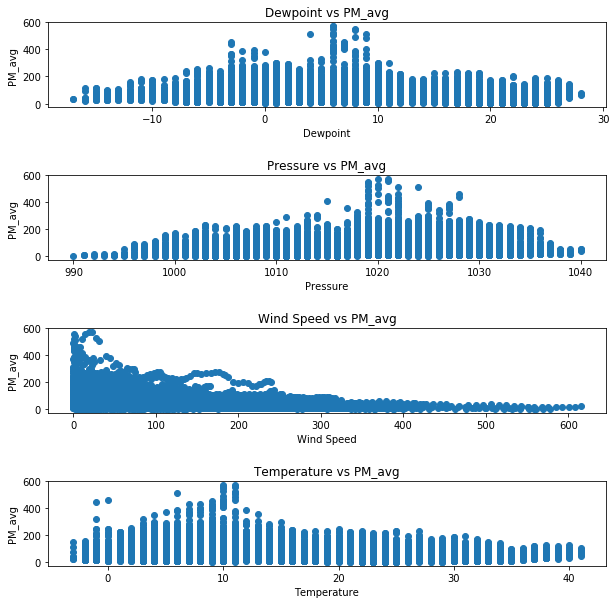

In [54]:
plt.figure(figsize=(10,10))

plt.subplot(4, 1, 1)
plt.scatter(df['DEWP'], df['PM_avg'])
plt.title('Dewpoint vs PM_avg')
plt.xlabel('Dewpoint')
plt.ylabel('PM_avg')

plt.subplot(4, 1, 2)
plt.scatter(df['Iws'], df['PM_avg'])
plt.title('Wind Speed vs PM_avg')
plt.xlabel('Wind Speed')
plt.ylabel('PM_avg')

plt.subplot(4, 1, 3)
plt.scatter(df['PRES'], df['PM_avg'])
plt.title('Pressure vs PM_avg')
plt.xlabel('Pressure')
plt.ylabel('PM_avg')

plt.subplot(4, 1, 4)
plt.scatter(df['TEMP'], df['PM_avg'])
plt.title('Temperature vs PM_avg')
plt.xlabel('Temperature')
plt.ylabel('PM_avg')

plt.subplots_adjust(hspace=0.8)
plt.show()


## Question 2 - Does the strength of these factors depend on the season the measurement is taken?

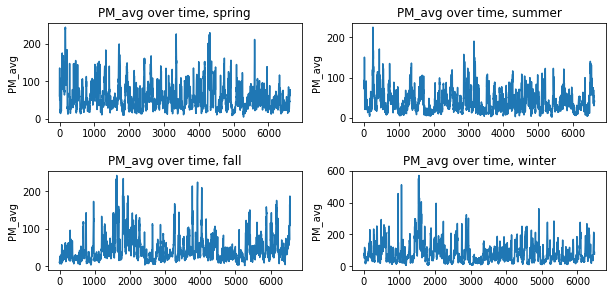

In [46]:
plt.figure(figsize=(10,10))

plt.subplot(4, 2, 1)
plt.plot(range(len(df_spring)), df_spring['PM_avg'])
plt.title('PM_avg over time, spring')
plt.ylabel('PM_avg')

plt.subplot(4, 2, 2)
plt.plot(range(len(df_summer)), df_summer['PM_avg'])
plt.title('PM_avg over time, summer')
plt.ylabel('PM_avg')

plt.subplot(4, 2, 3)
plt.plot(range(len(df_fall)), df_fall['PM_avg'])
plt.title('PM_avg over time, fall')
plt.ylabel('PM_avg')

plt.subplot(4, 2, 4)
plt.plot(range(len(df_winter)), df_winter['PM_avg'])
plt.title('PM_avg over time, winter')
plt.ylabel('PM_avg')
plt.subplots_adjust(hspace=0.5)

plt.show()


As we can see in the figures above, PM measurements vary by season. PM measurements are much highest in winter and lowest in summer. Since we've previously established that temperature is the least significant of the major influences on PM measurements we should explore further any possible variations in the strong factors we have identified above. 

In [8]:
# create subsets of df for each season 
df_spring = df.loc[lambda df: df['season']==1, :]
df_summer = df.loc[lambda df: df['season']==2, :]
df_fall = df.loc[lambda df: df['season']==3, :]
df_winter = df.loc[lambda df: df['season']==4, :]
# create spring factor correlations
spring_dewp = scipy.stats.spearmanr(df_spring['PM_avg'], df_spring['DEWP'], nan_policy='omit')
spring_iws = scipy.stats.spearmanr(df_spring['PM_avg'], df_spring['Iws'], nan_policy='omit')
spring_pres = scipy.stats.spearmanr(df_spring['PM_avg'], df_spring['PRES'], nan_policy='omit')
spring_wdsw = scipy.stats.spearmanr(df_spring['PM_avg'], df_spring['cbwd']=='SW', nan_policy='omit')
spring_wdnw = scipy.stats.spearmanr(df_spring['PM_avg'], df_spring['cbwd']=='NW', nan_policy='omit')
# create summer factor correlations
summer_dewp = scipy.stats.spearmanr(df_summer['PM_avg'], df_summer['DEWP'], nan_policy='omit')
summer_iws = scipy.stats.spearmanr(df_summer['PM_avg'], df_summer['Iws'], nan_policy='omit')
summer_pres = scipy.stats.spearmanr(df_summer['PM_avg'], df_summer['PRES'], nan_policy='omit')
summer_wdsw = scipy.stats.spearmanr(df_summer['PM_avg'], df_summer['cbwd']=='SW', nan_policy='omit')
summer_wdnw = scipy.stats.spearmanr(df_summer['PM_avg'], df_summer['cbwd']=='NW', nan_policy='omit')
# create fall factor correlations
fall_dewp = scipy.stats.spearmanr(df_fall['PM_avg'], df_fall['DEWP'], nan_policy='omit')
fall_iws = scipy.stats.spearmanr(df_fall['PM_avg'], df_fall['Iws'], nan_policy='omit')
fall_pres = scipy.stats.spearmanr(df_fall['PM_avg'], df_fall['PRES'], nan_policy='omit')
fall_wdsw = scipy.stats.spearmanr(df_fall['PM_avg'], df_fall['cbwd']=='SW', nan_policy='omit')
fall_wdnw = scipy.stats.spearmanr(df_fall['PM_avg'], df_fall['cbwd']=='NW', nan_policy='omit')
# create winter factor correlations
winter_dewp = scipy.stats.spearmanr(df_winter['PM_avg'], df_winter['DEWP'], nan_policy='omit')
winter_iws = scipy.stats.spearmanr(df_winter['PM_avg'], df_winter['Iws'], nan_policy='omit')
winter_pres = scipy.stats.spearmanr(df_winter['PM_avg'], df_winter['PRES'], nan_policy='omit')
winter_wdsw = scipy.stats.spearmanr(df_winter['PM_avg'], df_winter['cbwd']=='SW', nan_policy='omit')
winter_wdnw = scipy.stats.spearmanr(df_winter['PM_avg'], df_winter['cbwd']=='NW', nan_policy='omit')
# create dataframe to compare seasonal factors
seasonalfactors = pd.DataFrame(
    columns=['Spring', 'Summer', 'Fall', 'Winter'], 
    index=['Dewpoint', 'Windspeed', 'Pressure', 'Wind SW', 'Wind NW'])
seasonalfactors['Spring'] = [spring_dewp, spring_iws, spring_pres, spring_wdsw, spring_wdnw]
seasonalfactors['Summer'] = [summer_dewp, summer_iws, summer_pres, summer_wdsw, summer_wdnw]
seasonalfactors['Fall'] = [fall_dewp, fall_iws, fall_pres, fall_wdsw, fall_wdnw]
seasonalfactors['Winter'] = [winter_dewp, winter_iws, winter_pres, winter_wdsw, winter_wdnw]
# display dataframe to compare seasonal factors
seasonalfactors

,Spring,Summer,Fall,Winter
Dewpoint,"(0.157182372067, 6.772961484859447e-38)","(-0.0549531633981, 7.772931267733272e-06)","(-0.30592333379, 6.4781367625468115e-142)","(-0.00982912499428, 0.4289950250708676)"
Windspeed,"(-0.332330379059, 1.7133173043383032e-170)","(-0.308497821441, 8.563841173852304e-146)","(-0.253352359373, 1.8880542945300424e-96)","(-0.30621166299, 1.133731053736042e-140)"
Pressure,"(-0.214546333541, 8.285997108041527e-70)","(-0.0121881067987, 0.32227648833304223)","(0.283966221807, 1.0349836399406332e-121)","(-0.127533366558, 6.704843162302093e-25)"
Wind SW,"(0.254062288703, 4.34810123381e-98)","(0.405981447116, 6.113281486872978e-261)","(0.474168284255, 0.0)","(0.467435126521, 0.0)"
Wind NW,"(0.207058883341, 4.60839104858e-65)","(0.429481578923, 4.040052981989377e-295)","(0.464510544532, 0.0)","(0.404147774551, 4.080946789060742e-253)"


From the above chart we can see that there is significant season variation on the strength of these factors which have the largest effect on PM measurements. Winspeed from the SW or NW is the strongest factor measured, yet the effect in the spring is meerly half as large as it is during the rest of the year. Pressure has an almost negligible effect on PM measurements in the summer and is strongest in the fall. Dewpoint, the weakest of the strong factors, normally has a negative correlation with PM measurement, however this is reversed in the spring. 

Overall, this breakdown in how weather factors affect PM measurements through the course of the year can be helpful in guiding both governement policy and corporate behavior. A governement agency may decide to release regulations restricting high pollution activities to seasons when the environment is most likely to minimize the pollution effects on public health. Or a public health department may talior their outdoor activity recommendations to when the weather is most likely to minimize risks to public health. In the future when we are more likely to have carbon pricing a production scheduling department in a factory may consider such factors when deciding how to schedule their production activities. 

# Question 3 - Can any trends about manufacturing patterns be gleaned from this data?

By plotting PM versus time we see that readings increase in two shifts, from 1000-1500 and then from 2100 to 0200. However, when we break this down by season we see significant seasonal variability.

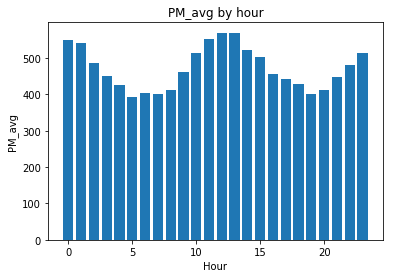

In [4]:
# This plot shows that measurements tend to be higher in the morning compared to the afternoon. This leads me to infer
# that high poluting manufacturing likely takes place late at night or early in the morning. 
plt.bar(df['hour'], df['PM_avg'])
plt.title('PM_avg by hour')
plt.xlabel('Hour')
plt.ylabel('PM_avg')

plt.show()

KeyError: 0

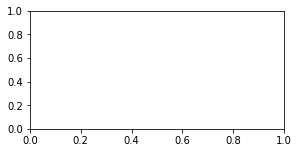

In [9]:
plt.figure(figsize=(10,10))
# plot PM_avg by hour, spring
plt.subplot(4, 2, 1)
plt.bar(df_spring['hour'], df_spring['PM_avg'])
plt.title('PM_avg by hour, spring')
plt.xlabel('Hour')
plt.ylabel('PM_avg')
# plot PM_avg by hour, summer
plt.subplot(4, 2, 2)
plt.bar(df_summer['hour'], df_summer['PM_avg'])
plt.title('PM_avg by hour, summer')
plt.xlabel('Hour')
plt.ylabel('PM_avg')
# plot PM_avg by hour, fall
plt.subplot(4, 2, 3)
plt.bar(df_fall['hour'], df_fall['PM_avg'])
plt.title('PM_avg by hour, fall')
plt.xlabel('Hour')
plt.ylabel('PM_avg')
# plot PM_avg by hour, winter
plt.subplot(4, 2, 4)
plt.bar(df_winter['hour'], df_winter['PM_avg'])
plt.title('PM_avg by hour, winter')
plt.xlabel('Hour')
plt.ylabel('PM_avg')

plt.subplots_adjust(hspace=0.5)
plt.show()

# Conclusion

To summarize, combined windspeed, wind direction, dewpoint, and temperature were the weather variables with the most significant effects on particulate measurements. However, these effects varied significantly over the course of the year. Particulate measurements also had discernable patterns which correlated with two main manufacturing shifts, day and night, even though time of day wasn't a strong variable overall. 

In this analysis we have identified the most important weather variables impacting particulate measurements for an industrial city in a rapily developing economy. We identified the strength of these various factors and explored how they varied by season while also uncovering the explicit relationship between these variables and particulate measurements independent of time. These sorts of insights can be used by industrial and governmental organzations to work together to maximize economic development while also caring for local public health and the global impact on climate. 

Future explorations of this data might include an hourly breakdown of particle measurement fluxuations and the influence of the identified weather variables on measurements. It would also be interesting to have data on average particle size to see if that changed which weather factors were most important. For instance, would that make rainfall a more prominent factor or not? Also, global comparative studies of industrializing areas in similar and different weather zone could provide valuable data to guide newly industrializing areas to learn from the successes and failures of previous industrial develpment. 